Importing all required packages

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Loading Dataset using OS

In [2]:
clear_face = os.listdir(r"E:\New_Projects\infosys_project\dataset\clear_face")
darkspots = os.listdir(r"E:\New_Projects\infosys_project\dataset\darkspots")
puffy_eyes = os.listdir(r"E:\New_Projects\infosys_project\dataset\puffy_eyes")
wrinkles = os.listdir(r"E:\New_Projects\infosys_project\dataset\wrinkles")


Ensure balanced distribution and clean samples.

In [3]:
print("clear_face_count is:",len(clear_face))
print("Darkspots_count is:",len(darkspots))
print("puffy_eyes_count is:",len(puffy_eyes))
print("wrinkles_count is:",len(wrinkles))


clear_face_count is: 97
Darkspots_count is: 102
puffy_eyes_count is: 101
wrinkles_count is: 100


Class distribution plot

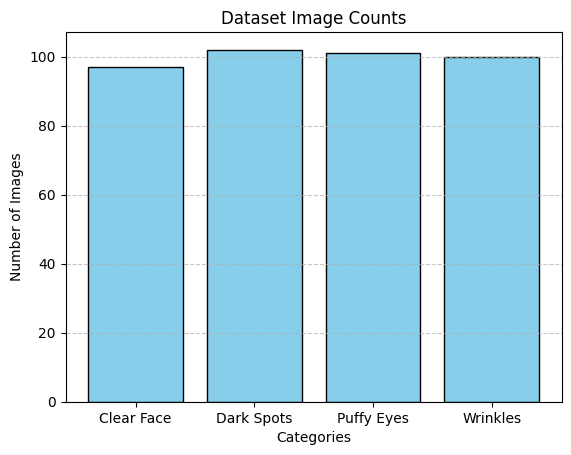

In [4]:
counts = {
    "Clear Face": len(clear_face),
    "Dark Spots": len(darkspots),
    "Puffy Eyes": len(puffy_eyes),
    "Wrinkles": len(wrinkles)
}

plt.bar(counts.keys(), counts.values(), color="skyblue", edgecolor="black")

plt.title("Dataset Image Counts")
plt.xlabel("Categories")
plt.ylabel("Number of Images")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

OnehotEncoding

In [5]:
data = [['clear_face'], ['darkspots'], ['puffy_eyes'], ['wrinkles']]
df = pd.DataFrame(data, columns=['Catagorical_data'])

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['Catagorical_data']])
print(encoded)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Resize and normalize images (224x224).

In [6]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

Found 319 images belonging to 4 classes.
Found 78 images belonging to 4 classes.
Labels found: {'clear_face': 0, 'darkspots': 1, 'puffy_eyes': 2, 'wrinkles': 3}


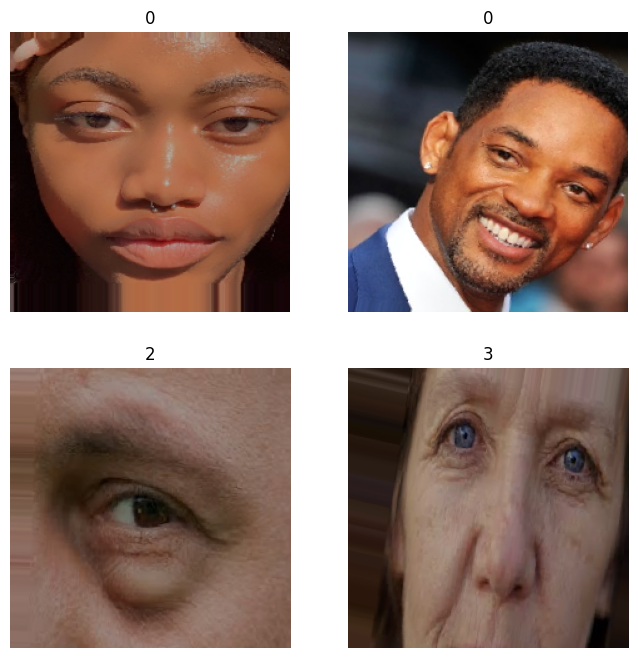

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Dataset folder
path = "E:/New_Projects/infosys_project/dataset/"

# Set up the generator with random transformations
gen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=12,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.4, 1.1],
    validation_split=0.2
)

# Create training and validation generators
train = gen.flow_from_directory(path, target_size=(224, 224),
                                batch_size=16, class_mode='categorical',
                                subset='training')

val = gen.flow_from_directory(path, target_size=(224, 224),
                              batch_size=16, class_mode='categorical',
                              subset='validation')

print("Labels found:", train.class_indices)

# Show sample images
x, y = next(train)
plt.figure(figsize=(8, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(x[i])
    plt.title(np.argmax(y[i]))
    plt.axis("off")
plt.show()


Found 319 images belonging to 4 classes.
Found 78 images belonging to 4 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 450s 15us/step
Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4231 - loss: 1.4803
Epoch 1: val_accuracy improved from -inf to 0.65385, saving model to best_densenet_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.4311 - loss: 1.4588 - val_accuracy: 0.6538 - val_loss: 0.9948 - learning_rate: 5.0000e-04
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7622 - loss: 0.6396
Epoch 2: val_accuracy improved from 0.65385 to 0.67949, saving model to best_densenet_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7644 - loss: 0.6355 - val_accuracy: 0.6795 - val_loss: 0.8681 - learning_rate: 5.0000e-04
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8209 - loss: 0.5230
Epoch 3: val_accuracy improved from 0.67949 to 0.71795, saving model to best_densenet_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8238 - loss: 0.5161 - val_accuracy: 0.7179 - val_loss: 0.7516 - learning_rate: 5.0000e-04
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8423 - loss: 0.4182
Epoch 4: val_accuracy did not improve from 0.71795
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8424 - loss: 0.4176 - val_accuracy: 0.7051 - val_loss: 0.7128 - learning_rate: 5.0000e-04
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8654 - loss: 0.3427
Epoch 5: val_accuracy did not improve from 0.71795
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8674 - loss: 0.3391 - val_accuracy: 0.7051 - val_loss: 0.6273 - learning_rate: 5.0000e-04
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8882 - loss: 0.3134
Epoch 6: val_accuracy improved from 0.71795 to 0.78205, saving model to best_densenet_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8889 - loss: 0.3095 - val_accuracy: 0.7821 - val_loss: 0.7075 - learning_rate: 5.0000e-04
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9160 - loss: 0.2234
Epoch 7: val_accuracy did not improve from 0.78205
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9165 - loss: 0.2219 - val_accuracy: 0.7821 - val_loss: 0.7000 - learning_rate: 5.0000e-04
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9090 - loss: 0.2310
Epoch 8: val_accuracy did not improve from 0.78205

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9099 - loss: 0.2305 - val_accuracy: 0.7564 - val_loss: 0.7888 - learning_rate: 5.0000e-04
Epoch 9/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9382 - loss: 0.2430
Epoch 9: val_accuracy did not improve from 0.78205
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9381 - loss: 0.2417 - val_accuracy: 0.

10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9607 - loss: 0.1253 - val_accuracy: 0.8333 - val_loss: 0.5399 - learning_rate: 2.0000e-04
Epoch 12/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9434 - loss: 0.1390
Epoch 12: val_accuracy did not improve from 0.83333
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9431 - loss: 0.1394 - val_accuracy: 0.7564 - val_loss: 0.7069 - learning_rate: 2.0000e-04
Epoch 13/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9743 - loss: 0.1252
Epoch 13: val_accuracy did not improve from 0.83333
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9735 - loss: 0.1257 - val_accuracy: 0.7949 - val_loss: 0.6167 - learning_rate: 2.0000e-04
Epoch 14/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9646 - loss: 0.1047
Epoch 14: val_accuracy did not improve from 0.83333

Epoch 14: ReduceLROnPlateau reducing learning rate to 8.000000379979611e-05.
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9639 - loss: 0.1060 - val_accura

10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9622 - loss: 0.1434 - val_accuracy: 0.8590 - val_loss: 0.6109 - learning_rate: 4.0000e-06
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9160 - loss: 0.1563
Epoch 7: val_accuracy did not improve from 0.85897
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9168 - loss: 0.1551 - val_accuracy: 0.8077 - val_loss: 0.6332 - learning_rate: 4.0000e-06
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9623 - loss: 0.1447
Epoch 8: val_accuracy did not improve from 0.85897

Epoch 8: ReduceLROnPlateau reducing learning rate to 1.5999999959603884e-06.
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9629 - loss: 0.1434 - val_accuracy: 0.7821 - val_loss: 0.6242 - learning_rate: 4.0000e-06
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 2.


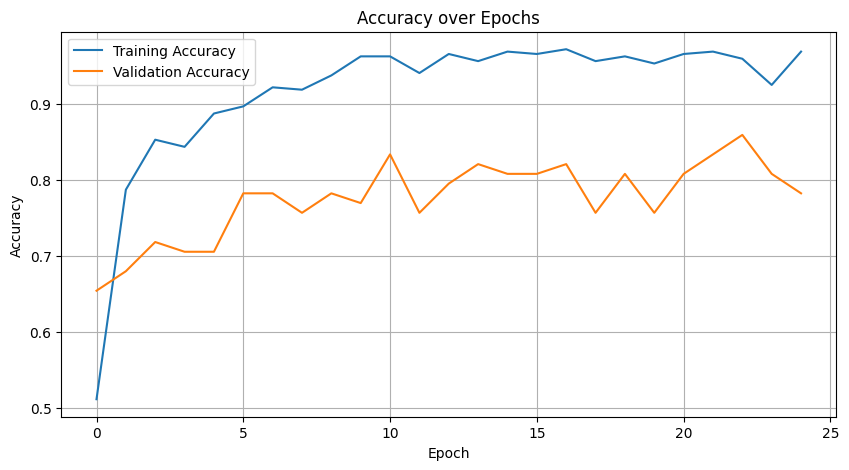

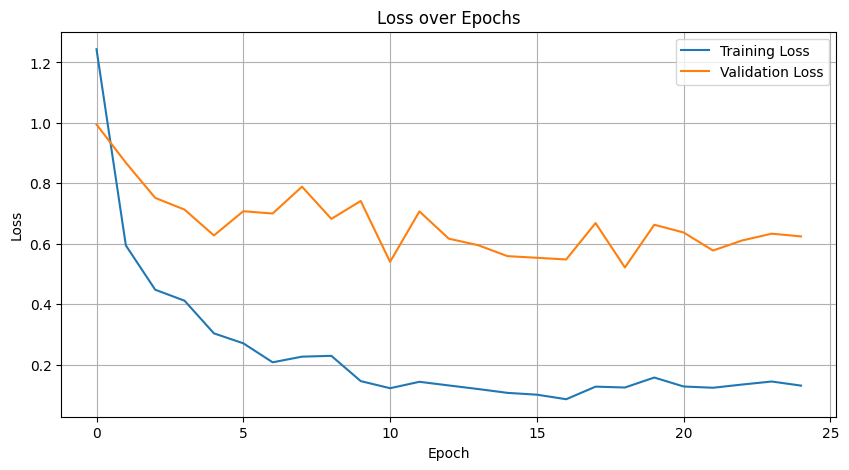

In [6]:
#module 3 using DenseNet121

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# ===================== DATASET DIRECTORY =====================
dataset_path = "E:/New_Projects/infosys_project/dataset/"

# ===================== DATA AUGMENTATION =====================
train_val_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    brightness_range=(0.7, 1.3),
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)

train_gen = train_val_gen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_gen = train_val_gen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

# ===================== BASE MODEL =====================
base_model = DenseNet121(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

# Freeze early layers for transfer learning
for layer in base_model.layers[:-40]:
    layer.trainable = False

# ===================== CUSTOM CLASSIFIER HEAD =====================
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.4)(x)
output_layer = Dense(train_gen.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output_layer)

# ===================== COMPILE MODEL =====================
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# ===================== CALLBACKS =====================
checkpoint = ModelCheckpoint(
    "best_densenet_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.4,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=6,
    restore_best_weights=True,
    verbose=1
)

# ===================== INITIAL TRAINING =====================
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=25,
    callbacks=[checkpoint, reduce_lr, early_stop],
    verbose=1
)

# ===================== FINE-TUNING =====================
for layer in base_model.layers[-60:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_finetune = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=[checkpoint, reduce_lr, early_stop],
    verbose=1
)

# ===================== PLOTTING METRICS =====================
train_acc = history.history["accuracy"] + history_finetune.history["accuracy"]
val_acc = history.history["val_accuracy"] + history_finetune.history["val_accuracy"]
train_loss = history.history["loss"] + history_finetune.history["loss"]
val_loss = history.history["val_loss"] + history_finetune.history["val_loss"]

plt.figure(figsize=(10, 5))
plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#module 3 using Mobilenetv2

No face detected in E:/New_Projects/infosys_project/dataset/clear_face\24.jpeg
No face detected in E:/New_Projects/infosys_project/dataset/darkspots\37.jpg
No face detected in E:/New_Projects/infosys_project/dataset/darkspots\43(1).jpg
No face detected in E:/New_Projects/infosys_project/dataset/puffy_eyes\21.jpg
No face detected in E:/New_Projects/infosys_project/dataset/wrinkles\75.jpg


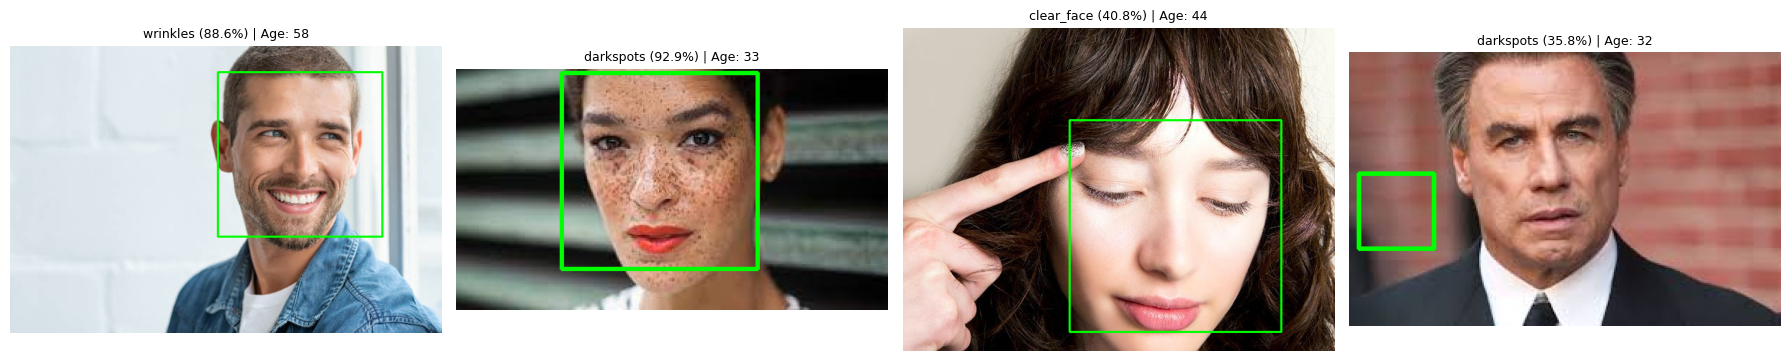

In [18]:
# ===============================
# MODULE 4: FACE DETECTION AND CLASSIFICATION USING DENSENET121
# ===============================

import cv2
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# ===============================
# Suppress TensorFlow warnings
# ===============================
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel('ERROR')

# ===============================
# Load the trained DenseNet121 model
# ===============================
model_path = "best_densenet_model.h5"  # Same file saved in Module 3
model = load_model(model_path)

# Class labels (ensure these match your dataset folder names)
labels = ['clear_face', 'darkspots', 'puffy_eyes', 'wrinkles']

# Haar Cascade for face detection
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# ===============================
# Function: Predict approximate age based on skin condition
# ===============================
def predict_age(class_name):
    if class_name == 'clear face':
        return np.random.randint(18, 28)
    elif class_name == 'darkspots':
        return np.random.randint(28, 38)
    elif class_name == 'puffy eyes':
        return np.random.randint(35, 48)
    elif class_name == 'wrinkles':
        return np.random.randint(50, 68)
    else:
        return np.random.randint(25, 55)

# ===============================
# Function: Detect faces and classify using DenseNet121
# ===============================
def detect_and_classify(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error reading image: {image_path}")
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detected_faces = face_detector.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

    if len(detected_faces) == 0:
        print(f"No face detected in {image_path}")
        return None

    for (x, y, w, h) in detected_faces:
        face_crop = img[y:y + h, x:x + w]
        resized_face = cv2.resize(face_crop, (224, 224))
        img_array = img_to_array(resized_face) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        predictions = model.predict(img_array, verbose=0)
        class_index = np.argmax(predictions)
        predicted_label = labels[class_index]
        confidence = predictions[0][class_index] * 100
        age_est = predict_age(predicted_label)

        # Fixed box color (Green)
        box_color = (0, 255, 0)

        # Draw bounding box only (no text)
        cv2.rectangle(img, (x, y), (x + w, y + h), box_color, 2)

        # Return RGB image for matplotlib (without text) + text separately
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB), f"{predicted_label} ({confidence:.1f}%) | Age: {age_est}"

    return None

 


  

# ===============================
# Visualize predictions for sample images
# ===============================
dataset_dir = "E:/New_Projects/infosys_project/dataset/"

plt.figure(figsize=(18, 6))
plot_index = 1

for label in labels:
    label_dir = os.path.join(dataset_dir, label)
    if not os.path.exists(label_dir):
        print(f"Directory not found: {label_dir}")
        continue

    img_files = [f for f in os.listdir(label_dir) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    if not img_files:
        print(f"No images found in {label_dir}")
        continue

    random.shuffle(img_files)

    for file in img_files:
        file_path = os.path.join(label_dir, file)
        output = detect_and_classify(file_path)
        if output is not None:
            result_img, result_text = output
            plt.subplot(1, len(labels), plot_index)
            plt.imshow(result_img)
            plt.title(result_text, fontsize=9, wrap=True)
            plt.axis("off")
            plot_index += 1
            break 

plt.tight_layout()
plt.show()
